In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import torch
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

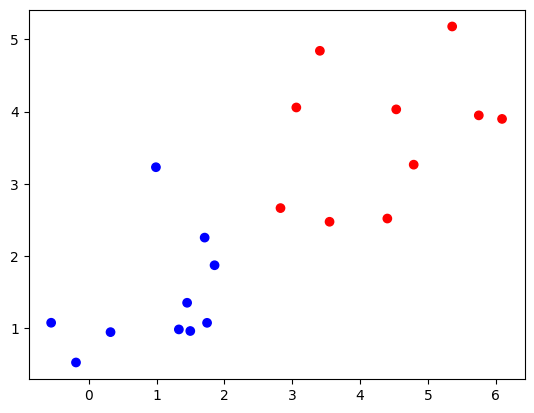

In [41]:
# Create dataset of 2 classes of points in 2D space

dist1 = torch.distributions.MultivariateNormal(torch.tensor([1., 1.]), torch.eye(2))
dist2 = torch.distributions.MultivariateNormal(torch.tensor([4., 4.]), torch.eye(2))

#Sample 10 points from each distribution
x1 = dist1.sample((10,))
x2 = dist2.sample((10,))
X = torch.cat((x1, x2), 0)

#Create labels for each class
y1 = torch.zeros(10, dtype=torch.long)
y2 = torch.ones(10, dtype=torch.long)
Y = torch.cat((y1, y2), 0)

#Plot the points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr')
plt.show()

In [42]:
# Create a neural network to classify the points
model = torch.nn.Sequential(
    torch.nn.Linear(2, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 2),
    torch.nn.Softmax(dim=1)
)

In [50]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[-0.3928, -1.3499],
        [ 1.8140,  1.2723],
        [-1.4888,  0.3407],
        [ 0.5027, -0.7804],
        [-0.1720, -0.4573]], requires_grad=True)
Parameter containing:
tensor([-0.2682, -2.3668,  3.8793, -0.3867, -0.5386], requires_grad=True)
Parameter containing:
tensor([[ 0.6076, -1.5608,  3.6026,  0.3658, -0.4037],
        [ 0.0502,  1.4537, -4.3323, -0.6299,  0.1723]], requires_grad=True)
Parameter containing:
tensor([ 2.5590, -2.4514], requires_grad=True)


In [43]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Train the model
for t in range(1000):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

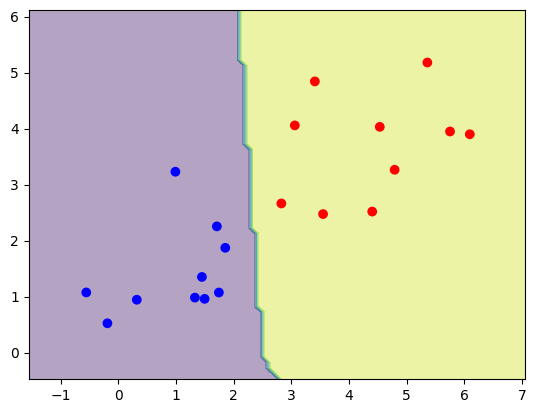

In [44]:
# Plot the decision boundary
def plot_decision_boundary(X, Y, model):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = torch.meshgrid(torch.arange(x1_min, x1_max, 0.1),
                              torch.arange(x2_min, x2_max, 0.1))
    Z = model(torch.cat((xx1.reshape(-1, 1), xx2.reshape(-1, 1)), 1))
    Z = torch.max(Z, 1)[1]
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr')
    plt.show()

plot_decision_boundary(X, Y, model)